In [1]:
#!pip install opencv-python

In [2]:
import numpy as np
import pandas as pd
import random
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Dense,BatchNormalization, Flatten, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from tensorflow.keras.utils import Sequence
from keras.backend import epsilon
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import cv2
import os

from sklearn.metrics import classification_report, confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [3]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
train_dir = "./results/train"
train_class=os.listdir(train_dir)
print(train_class)

val_dir = "./results/val"
val_class=os.listdir(val_dir)
print(val_class)

test_dir = "./results/test"
test_class=os.listdir(test_dir)
print(test_class)

['Apple', 'Banana', 'Cabbage', 'Cherry', 'Dragon Fruit', 'Mango', 'Orange', 'Papaya', 'Pineapple']
['Apple', 'Banana', 'Cabbage', 'Cherry', 'Dragon Fruit', 'Mango', 'Orange', 'Papaya', 'Pineapple']
['Apple', 'Banana', 'Cabbage', 'Cherry', 'Dragon Fruit', 'Mango', 'Orange', 'Papaya', 'Pineapple']


In [4]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy

x=[] # array value of the images
y=[] # the labels of the images

for folder in os.listdir(train_dir):
    image_list=os.listdir(train_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(train_dir+"/"+folder+"/"+img_name,target_size=(224,224))
        img=image.img_to_array(img)
        
        # Transfer Learning: Preprocess of MobileNetV2 model to our images before passing it to MobileNetV2
        img=preprocess_input(img)
        
        x.append(img) # appending image array
        y.append(train_class.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [5]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
val_images=[]
val_images_Original=[]
val_image_label=[]

for folder in os.listdir(val_dir):
    image_list=os.listdir(val_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(val_dir+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        val_images_Original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        val_images.append(img)
        val_image_label.append(val_class.index(folder))
        
print("Preparing Validation Dataset Completed.")

Preparing Validation Dataset Completed.


In [6]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
test_images=[]
test_images_Original=[]
test_image_label=[]

for folder in os.listdir(test_dir):
    image_list=os.listdir(test_dir+"/"+folder)
    for img_name in image_list:
        # Loading images
        img=image.load_img(test_dir+"/"+folder+"/"+img_name,target_size=(224,224))
        
        # Converting to arrarys
        img=image.img_to_array(img)
        
        # Saving original images, will be used just for display at the end
        test_images_Original.append(img.copy())
        img=preprocess_input(img) 
        
        # Appending arrays
        test_images.append(img)
        test_image_label.append(test_class.index(folder))
        
print("Preparing Test Dataset Completed.")

Preparing Test Dataset Completed.


In [7]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
# Training Dataset
print("Training Dataset")

x=np.array(x) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y) # onehot encoding of the labels
# print(y)
print(y.shape)

# Validation Dataset
print("Validation Dataset")

val_images=np.array(val_images) 
print(val_images.shape)

val_image_label=to_categorical(val_image_label) # onehot encoding of the labels)
print(val_image_label.shape)

print("Test Dataset")

test_images=np.array(test_images) 
print(test_images.shape)

test_image_label=to_categorical(test_image_label) # onehot encoding of the labels)
print(test_image_label.shape)

Training Dataset
(794, 224, 224, 3)
(794, 9)
Validation Dataset
(131, 224, 224, 3)
(131, 9)
Test Dataset
(142, 224, 224, 3)
(142, 9)


In [8]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
print("Splitting data for train and test completed.")

Splitting data for train and test completed.


In [9]:
rand_images1 = random.sample(os.listdir("./results/train/Orange"), 8)
rand_images2 = random.sample(os.listdir("./results/train/Apple"), 8)

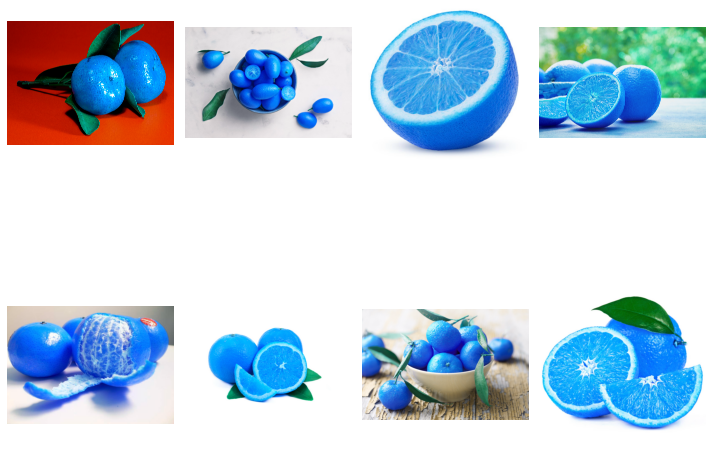

In [10]:
fig = plt.figure(figsize=(10,10))
for i, im in enumerate(rand_images1):
    plt.subplot(2,4 , i+1)
    im = cv2.imread(os.path.join("./results/train/Orange", im))
    plt.imshow(im)
    plt.axis('off')
plt.tight_layout()
plt.show()

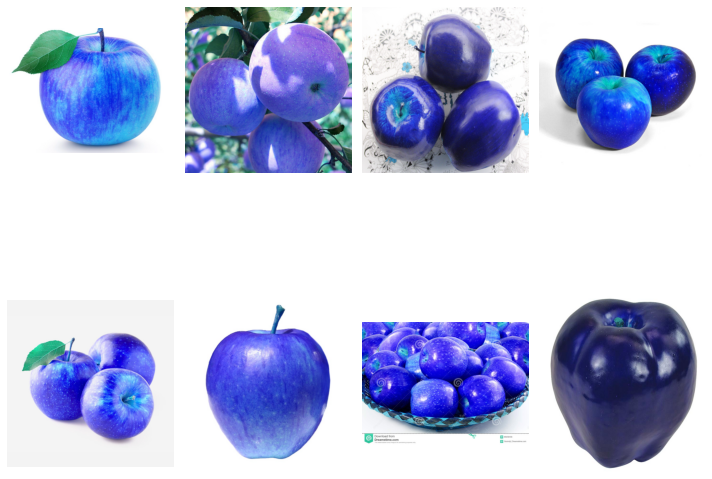

In [11]:
fig = plt.figure(figsize=(10,10))
for i, im in enumerate(rand_images2):
    plt.subplot(2,4 , i+1)
    im = cv2.imread(os.path.join("./results/train/Apple", im))
    plt.imshow(im)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection
mnet = MobileNetV2(include_top = False, weights = "imagenet" ,input_shape=(224,224,3))

In [16]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection
tf.keras.backend.clear_session()

model = Sequential([mnet,
                    GlobalAveragePooling2D(),
                    Dense(512, activation = "relu"),
                    BatchNormalization(),
                    Dropout(0.3),
                    Dense(128, activation = "relu"),
                    Dropout(0.1),
                    # Dense(32, activation = "relu"),
                    # Dropout(0.3),
                    Dense(9, activation = "softmax")])

model.layers[0].trainable = False

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")

model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                        

In [17]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

def scheduler(epoch):
    if epoch <= 2:
        return 0.001
    elif epoch > 2 and epoch <= 15:
        return 0.0001 
    else:
        return 0.00001

lr_callbacks = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [18]:
EPOCHS = 20
hist = model.fit(xtrain, ytrain, epochs=EPOCHS, callbacks=[lr_callbacks], validation_data=(xtest,ytest))

Epoch 1/20
20/20 [==============================] - 13s 523ms/step - loss: 0.9105 - accuracy: 0.7228 - val_loss: 0.4202 - val_accuracy: 0.8742 - lr: 0.0010
Epoch 2/20
20/20 [==============================] - 10s 514ms/step - loss: 0.1152 - accuracy: 0.9622 - val_loss: 0.2617 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 3/20
20/20 [==============================] - 10s 512ms/step - loss: 0.0384 - accuracy: 0.9953 - val_loss: 0.2289 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 4/20
20/20 [==============================] - 10s 514ms/step - loss: 0.0248 - accuracy: 0.9969 - val_loss: 0.2110 - val_accuracy: 0.9371 - lr: 1.0000e-04
Epoch 5/20
20/20 [==============================] - 10s 515ms/step - loss: 0.0278 - accuracy: 0.9969 - val_loss: 0.1984 - val_accuracy: 0.9308 - lr: 1.0000e-04
Epoch 6/20
20/20 [==============================] - 10s 516ms/step - loss: 0.0234 - accuracy: 0.9969 - val_loss: 0.1904 - val_accuracy: 0.9308 - lr: 1.0000e-04
Epoch 7/20
20/20 [==============================] - 

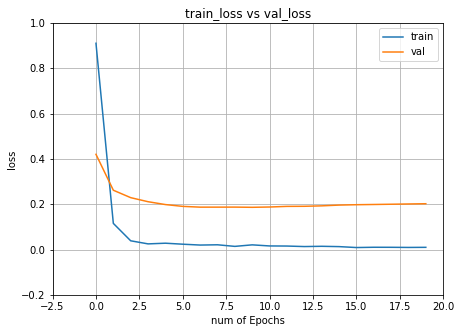

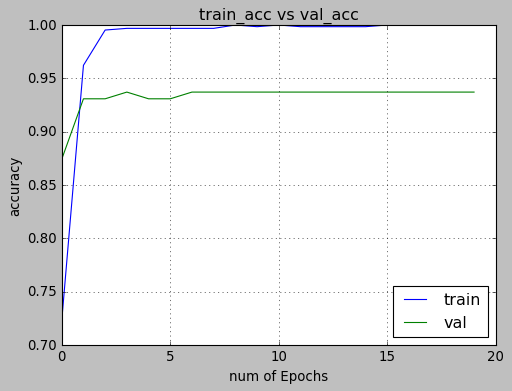

In [19]:
#Code by 'Real vs Fake face detection' https://www.kaggle.com/code/debasisdotcom/real-vs-fake-face-detection

epochs = 20
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
xc = range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

In [20]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
def predict(img_name, model):
    img=image.load_img(img_name,target_size=(224,224))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=preprocess_input(img)
    prediction=model.predict(img.reshape(1,224,224,3))
    output=np.argmax(prediction)
    print(train_class[output])


# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.astype('int32'))
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

In [21]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
# Preparing prediction arrary
predictions=[]

for img in test_images:
    img=img.reshape(1,224,224,3)
    predictions.append(model.predict(img))

1/1 [==============================] - 0s 28ms/step


In [22]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
pred_labels = model.predict(test_images)

5/5 [==============================] - 2s 352ms/step


In [23]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
def roundoff(arr):
    """To round off according to the argmax of each predicted label array. """
    arr[np.argwhere(arr != arr.max())] = 0
    arr[np.argwhere(arr == arr.max())] = 1
    return arr

for labels in pred_labels:
    labels = roundoff(labels)

print(classification_report(test_image_label, pred_labels, target_names=test_class))

              precision    recall  f1-score   support

       Apple       1.00      0.85      0.92        13
      Banana       1.00      1.00      1.00        13
     Cabbage       1.00      1.00      1.00        47
      Cherry       0.75      0.92      0.83        13
Dragon Fruit       0.93      0.93      0.93        14
       Mango       0.89      0.80      0.84        10
      Orange       1.00      1.00      1.00        13
      Papaya       0.78      1.00      0.88         7
   Pineapple       1.00      0.83      0.91        12

   micro avg       0.94      0.94      0.94       142
   macro avg       0.93      0.93      0.92       142
weighted avg       0.95      0.94      0.94       142
 samples avg       0.94      0.94      0.94       142



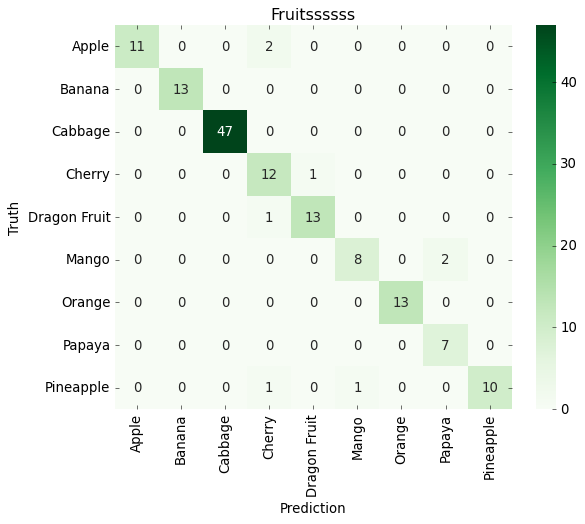

In [24]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
pred_ls = np.argmax(pred_labels, axis=1)
test_ls = np.argmax(test_image_label, axis=1)

conf_arr = confusion_matrix(test_ls, pred_ls)

plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(conf_arr, cmap='Greens', annot=True, fmt='d', xticklabels= test_class,
                yticklabels=test_class)

plt.title('Fruitssssss')
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.show(ax)

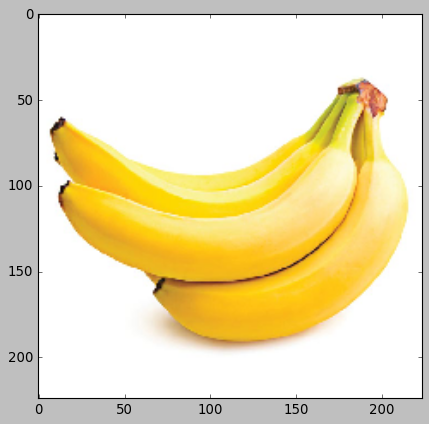

1/1 [==============================] - 0s 30ms/step
Banana


In [25]:
#Code by 'Transfer Learning - Image Classification + Deploy' https://www.kaggle.com/code/yash161101/transfer-learning-image-classification-deploy
predict("./results/test/Banana/Image_3.jpg",model)

In [26]:
model.save("Fruits_v04.h5")

In [27]:
from tensorflow import keras

In [28]:
model1 = keras.models.load_model('Fruits.h5')

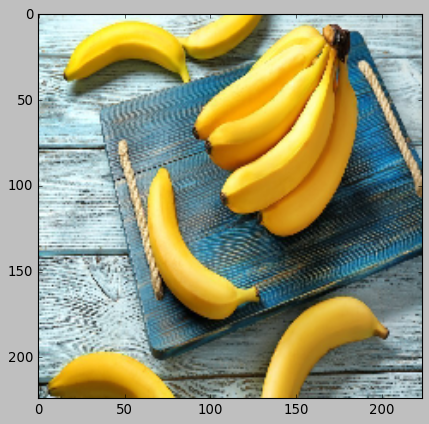

1/1 [==============================] - 1s 603ms/step
Banana


In [29]:
predict("b.jpg",model1)